In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734


In [3]:
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset.head()

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,35,3827,74,363,101,752,925,1,599,3630,332,2084,3,708
Stairway to Heaven - Remaster,772,15,4639,78,199,2350,186,1476,9,609,684,107,321,3,185
Bohemian Rhapsody - Remastered 2011,1045,19,4316,74,253,2085,243,0,0,736,1252,304,4010,3,216
Imagine - Remastered 2010,704,15,995,77,408,2602,116,2284,0,530,618,20,90,3,157
(I Can't Get No) Satisfaction - Mono Version,1516,9,1949,77,584,1484,703,1941,2,621,2061,106,3613,3,919


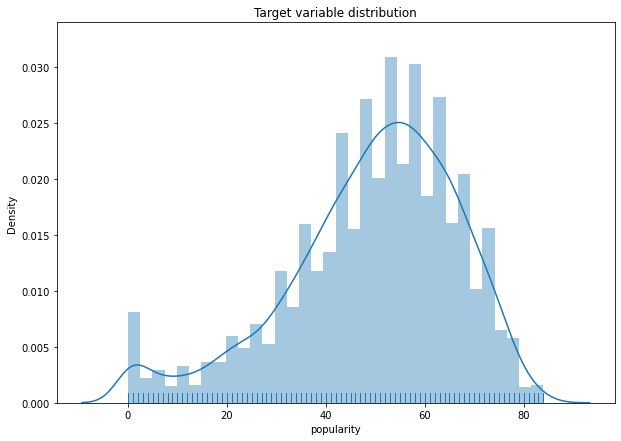

In [4]:
plt.figure(figsize=(10,7))
sns.distplot(dataset['popularity'], kde=True, rug=True)
plt.title('Target variable distribution')
plt.show()

In [5]:
X = dataset.drop(['popularity'], axis = 1)
Y = dataset.popularity.values
# Y = ['popularity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
X_columns = X.columns

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X = scaler.transform(X)

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
coeff_df = pd.DataFrame(lm.coef_, X_columns, columns=['Coefficient'])
coeff_df

,Coefficient
artist,-0.515649
release_date,-5.872850
length,1.093503
danceability,2.192790
acousticness,-0.518708
energy,-1.968368
instrumentalness,-1.260094
key,0.729812
liveness,-1.129308
loudness,3.722335


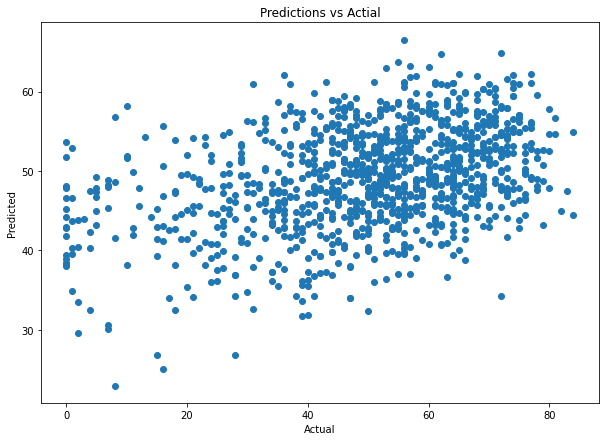

In [11]:
predictions = lm.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test,predictions)
plt.title('Predictions vs Actial')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

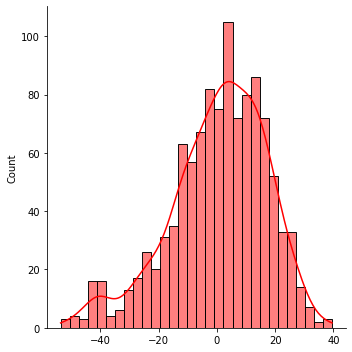

In [12]:
sns.displot((y_test - predictions), bins=30, kde=True, color = 'red')
plt.show()

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('\nMSE:', metrics.mean_squared_error(y_test, predictions))
print('\nRMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13.109822396646235

MSE: 274.3971977486321

RMSE: 16.564938809082033


## Polynomial basis functions

In [14]:
np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})

In [15]:
X = dataset.popularity.values
Y = dataset.energy.values

In [16]:
poly_model = make_pipeline(PolynomialFeatures(8), LinearRegression())
x = np.array(X)
poly_model.fit(X[:, np.newaxis], Y)

xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

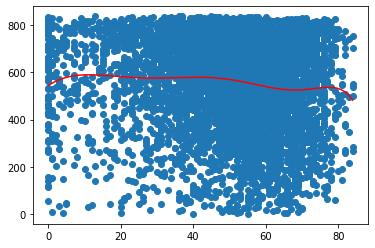

In [17]:
plt.scatter(X, Y)
plt.plot(xfit, yfit, color='red')

## Lasso regression

In [18]:
model = Lasso(alpha=0.0001)
model.fit(X[:, np.newaxis], Y);

In [19]:
print(print(model.intercept_))

604.1928528035702
None


In [20]:
yfit = model.predict(xfit[:, np.newaxis])

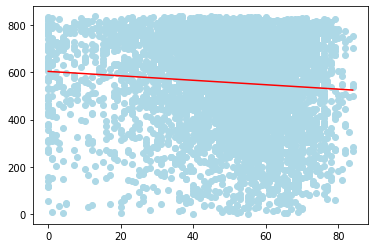

In [21]:
plt.scatter(X, Y, color='lightblue')
plt.plot(xfit, yfit, color='red')

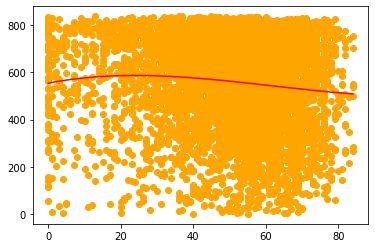

In [22]:
poly_model = make_pipeline(PolynomialFeatures(3), Lasso(alpha=1))
x = np.array(X)
poly_model.fit(X[:, np.newaxis], Y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(X, Y, color='orange')
plt.plot(xfit, yfit, color='red');

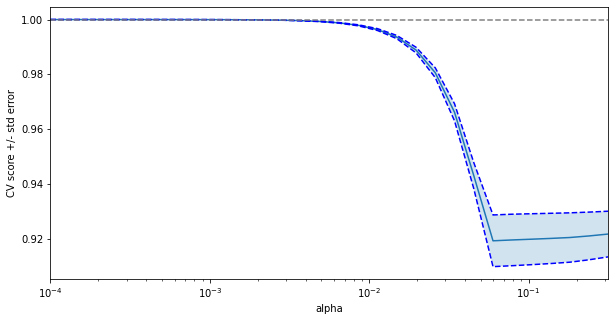

In [23]:
X = dataset[:150]
Y = dataset[:150]

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

plt.figure(figsize=(10,5))
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, Y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

## Ridge regression

In [24]:
X = dataset.popularity.values
Y = dataset.energy.values

In [25]:
model = Ridge(alpha=0.001)
model.fit(X[:, np.newaxis], Y);

In [26]:
print(print(model.intercept_))

604.1928692555374
None


In [27]:
yfit = model.predict(xfit[:, np.newaxis])

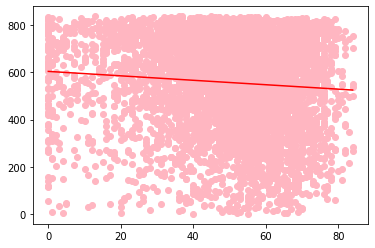

In [28]:
plt.scatter(X, Y, color='lightpink')
plt.plot(xfit, yfit, color='red')

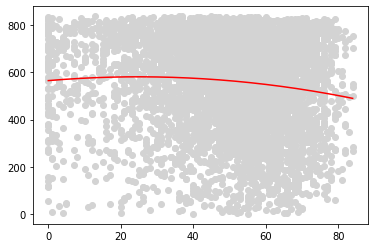

In [29]:
poly_model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.001))
X = np.array(X)
poly_model.fit(X[:, np.newaxis], Y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(X, Y, color='lightgray')
plt.plot(xfit, yfit, color='red')

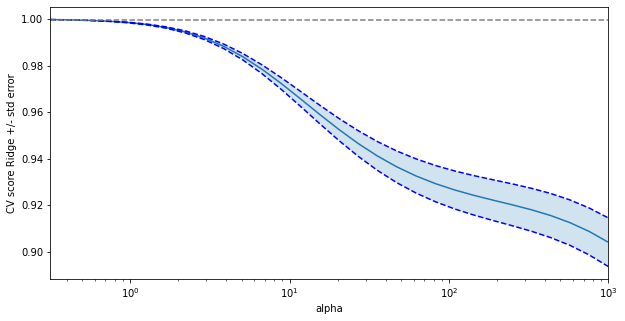

In [30]:
X = dataset[:150]
Y = dataset[:150]

ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-0.5, 3, 30)

tuned_parameters = [{'alpha': alphas}]

plt.figure(figsize=(10,5))
model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
model.fit(X, Y)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score Ridge +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()